## Observations and Insights 

In [154]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = '/Users/jacobcortez/Documents/GitHub/DS_Repos/HW_Repo/mapplotlib_challenge/Mouse_metadata.csv'
study_results_path = '/Users/jacobcortez/Documents/GitHub/DS_Repos/HW_Repo/mapplotlib_challenge/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [155]:
# Preview mouse data
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [156]:
# Preview study data
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [157]:
# Combine the data into a single dataset (interjoin)
merge_df = pd.merge(mouse_metadata, study_results, how = 'right',on="Mouse ID")

In [158]:
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [159]:
# Check for incomplete rows
merge_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [160]:
# Check for types in each row or column
merge_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [161]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df.duplicated(subset=['Mouse ID','Timepoint'])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [162]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_duplicates_df = merge_df.loc[merge_df.duplicated(subset=['Mouse ID','Timepoint'])]
merge_duplicates_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.000000,0
360,g989,Propriva,Female,21,26,5,47.570392,0
681,g989,Propriva,Female,21,26,10,49.880528,0
869,g989,Propriva,Female,21,26,15,53.442020,0
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [163]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df2 = merge_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
merge_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [164]:
# Checking the number of mice in the clean DataFrame.
mice_count_nunique2 = merge_df2[['Mouse ID','Timepoint']].nunique()
mice_count_nunique2

Mouse ID     249
Timepoint     10
dtype: int64

## Summary Statistics

In [165]:
# Create DF for Drug Regimen
summary_stats_df = merge_df2.groupby('Drug Regimen')
summary_stats_df.describe()

Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          156.0  10.570513  7.188801  1.0   5.00   8.0  16.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          156.0  27.076923  ...          56.491585  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                156.0  1.000000  1.089540  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

In [166]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
# mean, median, variance, standard deviation, and SEM of the tumor volume
tumor_volume_mean = summary_stats_df['Tumor Volume (mm3)'].mean()
tumor_volume_median = summary_stats_df['Tumor Volume (mm3)'].median()
tumor_volume_variance = summary_stats_df['Tumor Volume (mm3)'].var()
tumor_volume_std = summary_stats_df['Tumor Volume (mm3)'].std()
tumor_volume_sem = summary_stats_df['Tumor Volume (mm3)'].sem()

In [167]:
# Assemble the resulting series into a single summary dataframe.
tumor_volume_stats_df = pd.DataFrame({'Mean': tumor_volume_mean,'Median': tumor_volume_median,'Variance': tumor_volume_variance,'Standard Deviation': tumor_volume_std,'SEM': tumor_volume_sem})

In [168]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [169]:
# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_stats_df.agg('sum')

Mean                  509.832355
Median                499.484928
Variance              477.871189
Standard Deviation     68.156954
SEM                     5.009383
dtype: float64

## Bar and Pie Charts

In [170]:
# Load DF 
merge_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


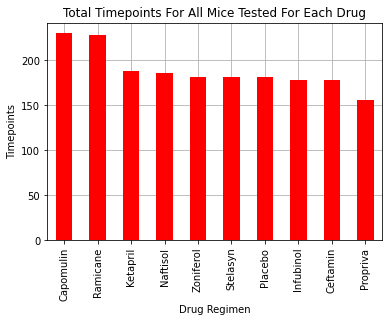

In [171]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
DR_bar_plot = merge_df2['Drug Regimen'].value_counts().plot.bar(width=.5, zorder=7, color='r',align='center')
plt.title('Total Timepoints For All Mice Tested For Each Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints')
plt.grid(zorder=0)


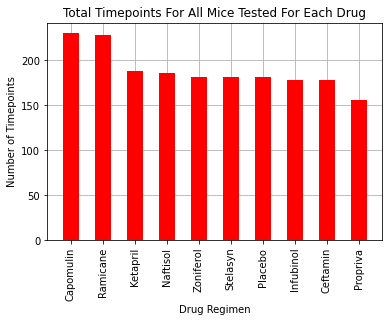

In [172]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Calculate the amount of data points for each drug regimen
timepoints_counts = merge_df2['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(timepoints_counts))

# Generate a bar blot with the length of the 'counts' series
plt.bar(x_axis, timepoints_counts, width = 0.5, zorder=3, color='r')

# Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints_counts.index.values)

# Rotate tick marks visibility
plt.xticks(rotation='vertical')

# Set labels for axes
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Total Timepoints For All Mice Tested For Each Drug')

# Create a grid - using 'zorder' places grid behind the bars since we set their z-order higher
plt.grid(zorder=0)

# Display resulting plot
plt.show()


Text(0, 0.5, '')

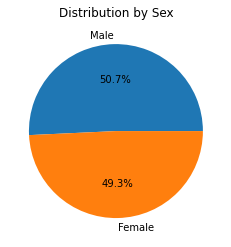

In [173]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df=merge_df2['Sex'].value_counts()

sex_pie_plot = sex_df.plot.pie(autopct="%1.1f%%", title='Distribution by Sex')

sex_pie_plot.set_ylabel('')

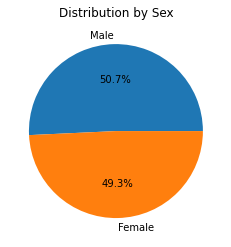

In [174]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df=merge_df2['Sex'].value_counts()

plt.pie(sex_df, labels=sex_df.index.values, autopct="%1.1f%%")
plt.title('Distribution by Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [175]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = pd.DataFrame(merge_df2.groupby('Mouse ID')['Timepoint'].max().sort_values())

# Reset the index & Rename
max_tp_df = pd.DataFrame(merge_df2.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max_Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df3 = pd.merge(merge_df2, max_tp_df,on="Mouse ID")
merge_df3


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_Timepoint
0,b128,Capomulin,Female,9,22,0,45.000000,0,45
1,b128,Capomulin,Female,9,22,5,45.651331,0,45
2,b128,Capomulin,Female,9,22,10,43.270852,0,45
3,b128,Capomulin,Female,9,22,15,43.784893,0,45
4,b128,Capomulin,Female,9,22,20,42.731552,0,45
...,...,...,...,...,...,...,...,...,...
1883,m601,Capomulin,Male,22,17,25,33.118756,1,45
1884,m601,Capomulin,Male,22,17,30,31.758275,1,45
1885,m601,Capomulin,Male,22,17,35,30.834357,1,45
1886,m601,Capomulin,Male,22,17,40,31.378045,1,45


In [176]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
    
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

for drug in drugs:

    # Locate each drug
    drugs_df = merge_df3.loc[merge_df3['Drug Regimen'] == drug]

    # Narrow down down our DF to the columns/rows we need
    drugs_final_volume_df = drugs_df.loc[drugs_df['Timepoint'] == drugs_df['Max_Timepoint']]

    # Create DF that has final volume of each drug into drug value list
    drugs_values_df = drugs_final_volume_df['Tumor Volume (mm3)']
    drug_values.append(drugs_values_df)

    # Calculate IQR for each drug
    quartile = drugs_values_df.quantile([.25,.5,.75])
    lowerq = quartile[.25]
    upperq = quartile[.75]
    iqr = upperq - lowerq
    print(f'IQR for {drug}: {iqr} ')
    
    # Find upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')

    # Check for outliers
    #drug_outliers_count_df = (drugs_values_df.loc[(drugs_final_volume_df['Tumor Volume (mm3)'] >= upper_bound)
     #                                   (drugs_final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    #print(f'Number of {drug} outliers: {drug_outliers_count_df}')

IQR for Capomulin: 7.781863460000004 
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
IQR for Ramicane: 9.098536719999998 
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
IQR for Infubinol: 11.477135160000003 
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
IQR for Ceftamin: 15.577752179999997 
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999


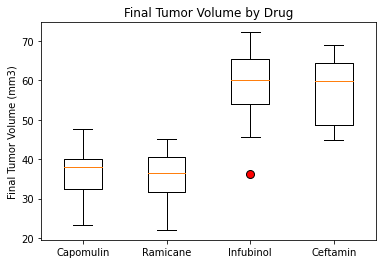

In [177]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(drug_values, flierprops=flierprops)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

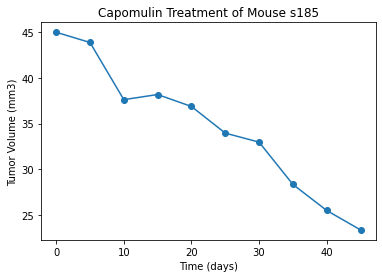

In [178]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capomulin = merge_df2.loc[merge_df2['Mouse ID']== 's185']
plt.plot(mouse_capomulin['Timepoint'], mouse_capomulin['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

plt.show()


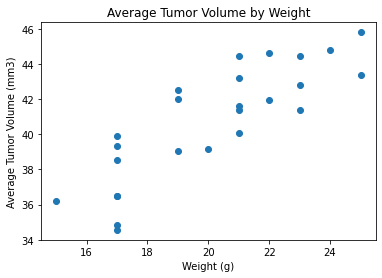

In [180]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Cases with Capomulin drug only
capomulin_df = merge_df2.loc[merge_df2['Drug Regimen']== 'Capomulin']

# Avg. Tumor Volume of Each Mouse with Capomulin drug
capomulin_avgvol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Combine the two DF for Camomulin drug
capomulin_avgvol_df = pd.merge(capomulin_df, capomulin_avgvol_df, on='Mouse ID')
capomulin_final_avgvol_df = capomulin_avgvol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
capomulin_final_avgvol_df

x = capomulin_final_avgvol_df['Weight (g)']
y = capomulin_final_avgvol_df['avg_tumor_vol']

# Create the scatter plot with new DF
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

In [188]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Use Scatter Plot code from above
capomulin_avgvol_df = pd.merge(capomulin_df, capomulin_avgvol_df, on='Mouse ID')
capomulin_final_avgvol_df = capomulin_avgvol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
capomulin_final_avgvol_df
x = capomulin_final_avgvol_df['Weight (g)']
y = capomulin_final_avgvol_df['avg_tumor_vol']

# Calculate the correlation and print answer
correlation = st.pearsonr(x,y)
print(f'The correlation between weight and average tumor volume with Capomulin regimen is {round(correlation[0],2)}.')

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Plot linear regression
plt.scatter(x,y)
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(20,37),fontsize=15,color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')

plt.show()



KeyboardInterrupt: 